### **QMSS 301: PREDICTIVE ANALYTICS PROJECT BY ANDREW VAN BAAL, EDITED 2/23/23**

**Importing Python Libraries**

In [ ]:
# Importing the necessary Python Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Importing and Exploring the Data**

In [ ]:
dropout_data = pd.read_csv('dropout_data.csv')
dropout_data.info()   # List basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3630 non-null   int64  
 1   moqual         3630 non-null   int64  
 2   faqual         3630 non-null   int64  
 3   admingrade     3630 non-null   float64
 4   eduspecneeds   3630 non-null   int64  
 5   prevgrade      3630 non-null   float64
 6   ownschshp      3630 non-null   int64  
 7   prevqual       3630 non-null   int64  
 8   displaced      3630 non-null   int64  
 9   debtor         3630 non-null   int64  
 10  paidfeetodate  3630 non-null   int64  
 11  gender         3630 non-null   int64  
 12  secsemgrade    3630 non-null   float64
 13  target         3630 non-null   int64  
 14  course         3630 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 425.5 KB


In [ ]:
dropout_data.head()

,Unnamed: 0,moqual,faqual,admingrade,eduspecneeds,prevgrade,ownschshp,prevqual,displaced,debtor,paidfeetodate,gender,secsemgrade,target,course
0,0,19,12,127.3,0,122.0,0,1,1,0,1,1,0.000000,0,171
1,1,1,3,142.5,0,160.0,0,1,1,0,0,1,13.666667,1,9254
2,2,37,37,124.8,0,122.0,0,1,1,0,0,1,0.000000,0,9070
3,3,38,37,119.6,0,122.0,0,1,1,0,1,0,12.400000,1,9773
4,4,37,38,141.5,0,100.0,0,1,0,0,1,0,13.000000,1,8014


**TRAIN TEST SPLIT**



In [ ]:
## ASSIGNING EXPLANATORY AND PREDICTOR DATA ##
x = dropout_data
y = dropout_data['target']

In [ ]:
## TRAIN/TEST SPLITTING ##
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size=0.8, # This is the proportion of the dataset to include in the train split.
    random_state=21, # This is set to control the shuffling applied to the data before spliting it. It helps to make the work reproducible
)

In [ ]:
y_train.value_counts(normalize=True)

1    0.612603
0    0.387397
Name: target, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

1    0.592287
0    0.407713
Name: target, dtype: float64

**BUILDING THE REGRESSION MODEL**

In [ ]:
## BUILDING THE MODEL ON THE TRAINED DATA ##
var_struct = "target ~ ownschshp + paidfeetodate + secsemgrade" 

model = smf.glm(formula = var_struct, data = x_train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                 2904
Model:                            GLM   Df Residuals:                     2900
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1125.2
Date:                Fri, 24 Feb 2023   Deviance:                       2250.4
Time:                        03:10:07   Pearson chi2:                 3.19e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.4805      0.269    -20.391

In [ ]:
## CALCULATING ODDS RATIOS FROM CORRELATION COEFFIENTS OF EXPLANATORY VARIABLES ##
np.exp(result.params)

Intercept         0.004167
ownschshp         4.189549
paidfeetodate    21.666502
secsemgrade       1.321792
dtype: float64

In [ ]:
x_train.count

<bound method DataFrame.count of       Unnamed: 0  moqual  faqual  admingrade  eduspecneeds  prevgrade  \
1968        2396       1       3       130.0             0      140.0   
2600        3172      12      38       116.9             0      127.0   
3056        3730       1      38       129.6             1      132.0   
1392        1686      38       1       111.9             0      121.0   
2071        2519      38      38       131.3             0      133.1   
...          ...     ...     ...         ...           ...        ...   
48            60      19      19       114.9             0      125.0   
772          939      37      37       110.0             0      133.1   
1848        2237      38      37       102.5             0      133.1   
1231        1483       1       1       124.3             0      126.0   
3017        3685       1       1       134.4             0      120.0   

      ownschshp  prevqual  displaced  debtor  paidfeetodate  gender  \
1968          0    

In [ ]:
x_test.count

<bound method DataFrame.count of       Unnamed: 0  moqual  faqual  admingrade  eduspecneeds  prevgrade  \
1656        2011      37      37       160.0             0      110.0   
2206        2691       1       4       121.8             0      127.0   
465          568      38      19       117.2             0      128.0   
2011        2446      37      37       150.0             0      150.0   
3539        4315       1       3       121.9             0      125.0   
...          ...     ...     ...         ...           ...        ...   
1196        1438       1       1       121.5             0      133.0   
3200        3900      37      38       137.3             0      142.0   
347          422       1       2       140.0             0      140.0   
1429        1731      19      19       133.9             0      136.0   
1314        1590       1      19       120.0             0      120.0   

      ownschshp  prevqual  displaced  debtor  paidfeetodate  gender  \
1656          0    

**RUNNING MODEL ON X-TRAIN**

In [ ]:
## APPLYING THE MODEL TO MAKE AN INITIAL PREDICTION ##
expl_data = x_train[["ownschshp", 'paidfeetodate',"secsemgrade"]] # Subsetting the column of the explanatory variables
x_train['pred'] = result.predict(expl_data)
x_train[:10]

,Unnamed: 0,moqual,faqual,admingrade,eduspecneeds,prevgrade,ownschshp,prevqual,displaced,debtor,paidfeetodate,gender,secsemgrade,target,course,pred
1968,2396,1,3,130.0,0,140.0,0,1,0,0,1,1,0.000000,0,9003,0.082814
2600,3172,12,38,116.9,0,127.0,0,1,1,1,1,0,12.250000,0,9254,0.733586
3056,3730,1,38,129.6,1,132.0,0,1,0,0,1,1,11.950000,1,9500,0.716912
1392,1686,38,1,111.9,0,121.0,0,1,1,0,1,1,12.285714,1,9085,0.735528
2071,2519,38,38,131.3,0,133.1,1,1,1,0,1,0,13.500000,1,9773,0.942363
2593,3165,1,1,128.4,0,134.0,1,1,1,0,1,0,13.250000,1,9085,0.938455
309,372,1,19,148.4,0,161.0,1,1,0,0,1,0,14.428571,1,9773,0.954924
3305,4020,3,1,155.0,0,133.1,0,1,0,0,1,0,0.000000,0,9670,0.082814
278,332,38,38,103.5,0,107.0,0,1,1,0,1,0,13.000000,1,9238,0.772439
2439,2978,5,3,124.8,0,129.0,0,1,1,0,1,0,12.000000,1,9070,0.719734


In [ ]:
## TURNING THE PREDICITON INTO A BINARY VARIABLE WITH A SET THRESHOLD ##
x_train["prediction"]=np.where(x_train["pred"] > 0.5, 1, 0)
x_train[:5]

,Unnamed: 0,moqual,faqual,admingrade,eduspecneeds,prevgrade,ownschshp,prevqual,displaced,debtor,paidfeetodate,gender,secsemgrade,target,course,pred,prediction
1968,2396,1,3,130.0,0,140.0,0,1,0,0,1,1,0.000000,0,9003,0.082814,0
2600,3172,12,38,116.9,0,127.0,0,1,1,1,1,0,12.250000,0,9254,0.733586,1
3056,3730,1,38,129.6,1,132.0,0,1,0,0,1,1,11.950000,1,9500,0.716912,1
1392,1686,38,1,111.9,0,121.0,0,1,1,0,1,1,12.285714,1,9085,0.735528,1
2071,2519,38,38,131.3,0,133.1,1,1,1,0,1,0,13.500000,1,9773,0.942363,1


In [ ]:
## LOGICAL COMPARISON OF BINARY PREDICTION AND BINARY TARGET ##
x_train["pred2true"]= np.where(x_train["prediction"] == x_train["target"], 1, 0) #using a logical check to see if prediction is equal to the actual outcome
x_train[:5]

,Unnamed: 0,moqual,faqual,admingrade,eduspecneeds,prevgrade,ownschshp,prevqual,displaced,debtor,paidfeetodate,gender,secsemgrade,target,course,pred,prediction,pred2true
1968,2396,1,3,130.0,0,140.0,0,1,0,0,1,1,0.000000,0,9003,0.082814,0,1
2600,3172,12,38,116.9,0,127.0,0,1,1,1,1,0,12.250000,0,9254,0.733586,1,0
3056,3730,1,38,129.6,1,132.0,0,1,0,0,1,1,11.950000,1,9500,0.716912,1,1
1392,1686,38,1,111.9,0,121.0,0,1,1,0,1,1,12.285714,1,9085,0.735528,1,1
2071,2519,38,38,131.3,0,133.1,1,1,1,0,1,0,13.500000,1,9773,0.942363,1,1


In [ ]:
## TRAIN MODEL ACCURACY ##
print("True Prediction: ", len(x_train.query("pred2true == 1"))) #logical test
print("False Prediction: ", len(x_train.query("pred2true == 0")))
print("Prediction Accuracy: ", accuracy_score(x_train['target'], x_train['prediction']))

True Prediction:  2437
False Prediction:  467
Prediction Accuracy:  0.8391873278236914


In [ ]:
## CALCULATING SPECIFICITY (True Negatives) ##
from sklearn.metrics import recall_score
recall_score(x_train['target'], x_train['prediction'], pos_label = 0) # looking at where target is students who dropped out

0.656

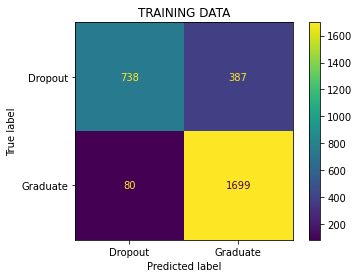

In [ ]:
## TRAINING DATA CONFUSION MATRIX ##
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(x_train['target'], x_train['prediction'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Dropout', 'Graduate'])

cm_display.plot()
plt.title('TRAINING DATA')
plt.show()

**RUNNING MODEL ON X-TEST**

In [ ]:
## APPLYING THE MODEL TO MAKE AN INITIAL PREDICTION ##
expl_data = x_test[["ownschshp", 'paidfeetodate',"secsemgrade"]] # Subsetting the column of the explanatory variables
x_test['pred'] = result.predict(expl_data)
x_test[:10]

,Unnamed: 0,moqual,faqual,admingrade,eduspecneeds,prevgrade,ownschshp,prevqual,displaced,debtor,paidfeetodate,gender,secsemgrade,target,course,pred
1656,2011,37,37,160.0,0,110.0,0,1,0,0,1,0,12.400000,1,9991,0.741684
2206,2691,1,4,121.8,0,127.0,0,1,0,0,1,1,13.500000,1,9147,0.796024
465,568,38,19,117.2,0,128.0,0,1,0,0,1,1,14.200000,1,9085,0.825911
2011,2446,37,37,150.0,0,150.0,0,40,1,0,1,1,16.200000,0,9991,0.892343
3539,4315,1,3,121.9,0,125.0,0,1,1,0,1,1,12.500000,0,9254,0.746993
1058,1267,19,37,121.3,0,127.0,1,1,1,0,1,0,12.464286,1,9500,0.924510
258,307,3,1,150.0,0,150.0,0,3,1,0,1,0,0.000000,0,9130,0.082814
3009,3676,37,19,119.9,0,101.0,0,1,1,1,0,0,11.250000,1,9238,0.087715
3522,4297,38,37,133.9,0,130.0,1,1,0,0,1,1,13.000000,1,9773,0.934302
32,40,3,3,121.1,0,126.0,0,1,0,1,1,0,0.000000,0,9773,0.082814


In [ ]:
## TURNING THE PREDICITON INTO A BINARY VARIABLE WITH A SET THRESHOLD ##
x_test["prediction"]=np.where(x_test["pred"] > 0.5, 1, 0)
x_test[:5]

,Unnamed: 0,moqual,faqual,admingrade,eduspecneeds,prevgrade,ownschshp,prevqual,displaced,debtor,paidfeetodate,gender,secsemgrade,target,course,pred,prediction
1656,2011,37,37,160.0,0,110.0,0,1,0,0,1,0,12.4,1,9991,0.741684,1
2206,2691,1,4,121.8,0,127.0,0,1,0,0,1,1,13.5,1,9147,0.796024,1
465,568,38,19,117.2,0,128.0,0,1,0,0,1,1,14.2,1,9085,0.825911,1
2011,2446,37,37,150.0,0,150.0,0,40,1,0,1,1,16.2,0,9991,0.892343,1
3539,4315,1,3,121.9,0,125.0,0,1,1,0,1,1,12.5,0,9254,0.746993,1


In [ ]:
## LOGICAL COMPARISON OF BINARY PREDICTION AND BINARY TARGET ##
x_test["pred2true"]= np.where(x_test["prediction"] == x_test["target"], 1, 0) #using a logical check to see if prediction is equal to the actual outcome
x_test[:5]

,Unnamed: 0,moqual,faqual,admingrade,eduspecneeds,prevgrade,ownschshp,prevqual,displaced,debtor,paidfeetodate,gender,secsemgrade,target,course,pred,prediction,pred2true
1656,2011,37,37,160.0,0,110.0,0,1,0,0,1,0,12.4,1,9991,0.741684,1,1
2206,2691,1,4,121.8,0,127.0,0,1,0,0,1,1,13.5,1,9147,0.796024,1,1
465,568,38,19,117.2,0,128.0,0,1,0,0,1,1,14.2,1,9085,0.825911,1,1
2011,2446,37,37,150.0,0,150.0,0,40,1,0,1,1,16.2,0,9991,0.892343,1,0
3539,4315,1,3,121.9,0,125.0,0,1,1,0,1,1,12.5,0,9254,0.746993,1,0


In [ ]:
## TEST MODEL ACCURACY**
print("True Prediction: ", len(x_test.query("pred2true == 1"))) #logical test
print("False Prediction: ", len(x_test.query("pred2true == 0")))
print("Prediction Accuracy: ", accuracy_score(x_test['target'], x_test['prediction']))

True Prediction:  598
False Prediction:  128
Prediction Accuracy:  0.8236914600550964


In [ ]:
## CALCULATING SPECIFICITY (True Negatives) ##
from sklearn.metrics import recall_score
recall_score(x_test['target'], x_test['prediction'], pos_label = 0) # looking at where target is students who dropped out

0.6385135135135135

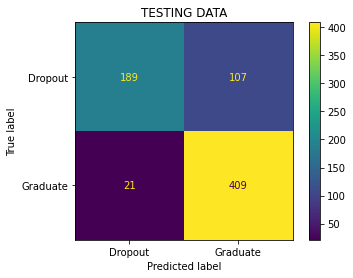

In [ ]:
## TESTING DATA CONFUSION MATRIX ##
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(x_test['target'], x_test['prediction'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Dropout', 'Graduate'])

cm_display.plot()
plt.title('TESTING DATA')
plt.show()


**PLOTTING PREDICTIONS**

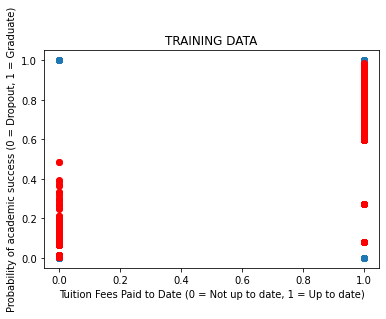

In [ ]:
## TRAINING DATA TUITION UP TO DATE PLOT ##
plt.scatter(x_train.paidfeetodate, y_train)
plt.scatter(x_train.paidfeetodate, x_train["pred"], color="red")
plt.xlabel("Tuition Fees Paid to Date (0 = Not up to date, 1 = Up to date)")
plt.ylabel("Probability of academic success (0 = Dropout, 1 = Graduate)")
plt.title("TRAINING DATA")
plt.show()

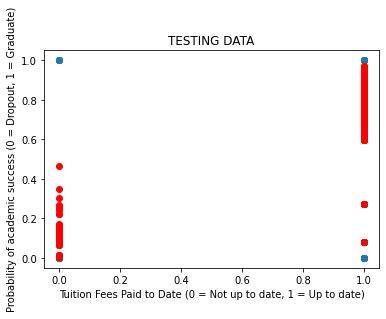

In [ ]:
## TESTING DATA TUITION UP TO DATE PLOT ##
plt.scatter(x_test.paidfeetodate, y_test)
plt.scatter(x_test.paidfeetodate, x_test["pred"], color="red")
plt.xlabel("Tuition Fees Paid to Date (0 = Not up to date, 1 = Up to date)")
plt.ylabel("Probability of academic success (0 = Dropout, 1 = Graduate)")
plt.title("TESTING DATA")
plt.show()

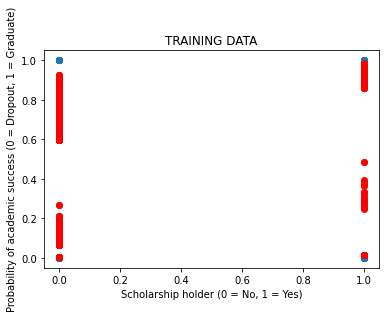

In [ ]:
## TRAINING DATA SCHOLARSHIP STATUS PLOT ##
plt.scatter(x_train.ownschshp, y_train)
plt.scatter(x_train.ownschshp, x_train["pred"], color="red")
plt.xlabel("Scholarship holder (0 = No, 1 = Yes)")
plt.ylabel("Probability of academic success (0 = Dropout, 1 = Graduate)")
plt.title('TRAINING DATA')
plt.show()

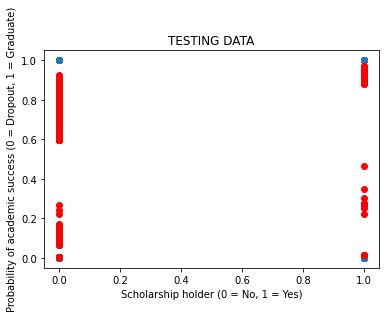

In [ ]:
## TESTING DATA SCHOLARSHIP STATUS PLOT ##
plt.scatter(x_test.ownschshp, y_test)
plt.scatter(x_test.ownschshp, x_test["pred"], color="red")
plt.xlabel("Scholarship holder (0 = No, 1 = Yes)")
plt.ylabel("Probability of academic success (0 = Dropout, 1 = Graduate)")
plt.title('TESTING DATA')
plt.show()

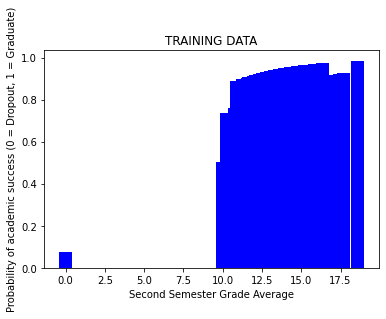

In [ ]:
## TRAINING DATA 2ND SEM GRADE PLOT ##
grouped_data = x_train.groupby('secsemgrade')['pred'].mean()

plt.bar(grouped_data.index, grouped_data, color = 'blue')

plt.title('TRAINING DATA')
plt.xlabel('Second Semester Grade Average')
plt.ylabel("Probability of academic success (0 = Dropout, 1 = Graduate)")
plt.show()

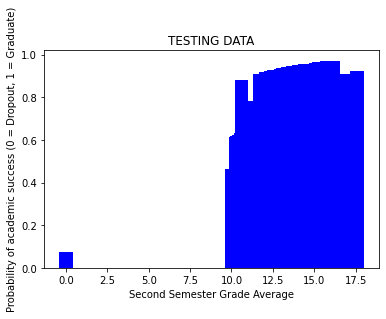

In [ ]:
## TRAINING DATA 2ND SEM GRADE PLOT ##
grouped_data = x_test.groupby('secsemgrade')['pred'].mean()

plt.bar(grouped_data.index, grouped_data, color = 'blue')

plt.title('TESTING DATA')
plt.xlabel('Second Semester Grade Average')
plt.ylabel("Probability of academic success (0 = Dropout, 1 = Graduate)")
plt.show()

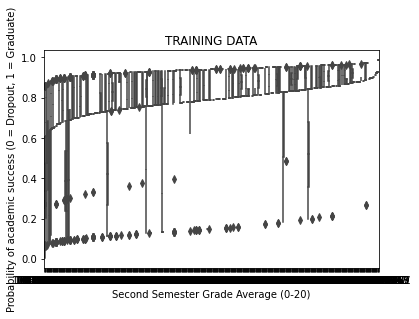

In [ ]:
## TRAINING DATA 2ND SEMESTER GRADES PLOT ##
import seaborn as sns

sns.boxplot(x='secsemgrade', y='pred', data=x_train)

plt.title('TRAINING DATA')
plt.xlabel('Second Semester Grade Average (0-20)')
plt.ylabel('Probability of academic success (0 = Dropout, 1 = Graduate)')

plt.show()

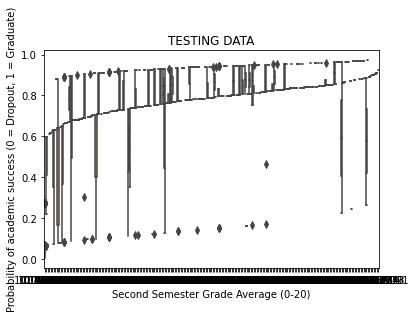

In [ ]:
## TESTING DATA 2ND SEMESTER GRADES PLOT ##
sns.boxplot(x='secsemgrade', y='pred', data=x_test)

plt.title('TESTING DATA')
plt.xlabel('Second Semester Grade Average (0-20)')
plt.ylabel('Probability of academic success (0 = Dropout, 1 = Graduate)')

plt.show()